In [35]:
import pandas as pd
import altair as alt

In [36]:
batting_df = pd.read_csv('../combined_data/batting_combined_fill_na.csv')

In [37]:
batting_df['missing_value_count'] = batting_df.isnull().sum(axis=1)

In [38]:
# grouped_by_year_df = batting_df.groupby('Year').mean().reset_index()
# grouped_by_year_df

numeric_columns = batting_df.select_dtypes(include='number').columns
grouped_by_year_df = batting_df.groupby('Year', as_index=False)[numeric_columns].mean()

# Notes:
# Yosef- I used altair to create the same plot. We are able to see the same information, but in a more interactive way.

In [39]:
import altair as alt

grouped_by_league_year_df = batting_df.groupby(['League', 'Year'])['missing_value_count'].mean().reset_index()

chart = alt.Chart(grouped_by_league_year_df).mark_line(point=True).encode(
    x='Year:O',
    y='missing_value_count:Q',
    color='League:N',
    tooltip=['League', 'Year', 'missing_value_count']
).properties(
    title='Average Missing Values Over Time by League - Altair',
    width=800,
    height=400
).interactive()

chart

alt.Chart(...)

In [40]:
# # Plot the average batting age over time
# plt.figure(figsize=(10, 6))
# plt.plot(grouped_by_year_df['Year'], grouped_by_year_df['BatAge'], m  arker='o')
# plt.title('Average Batting Age Over Time')
# plt.xlabel('Year')
# plt.ylabel('Average Batting Age')
# plt.grid(True)
# plt.show()

# # Plot the average runs per game over time
# plt.figure(figsize=(10, 6))
# plt.plot(grouped_by_year_df['Year'], grouped_by_year_df['R/G'], marker='o')
# plt.title('Average Runs Per Game Over Time')
# plt.xlabel('Year')
# plt.ylabel('Average Runs Per Game')
# plt.grid(True)
# plt.show()

# # Plot the average number of home runs over time
# plt.figure(figsize=(10, 6))
# plt.plot(grouped_by_year_df['Year'], grouped_by_year_df['HR'], marker='o')
# plt.title('Average Number of Home Runs Over Time')
# plt.xlabel('Year')
# plt.ylabel('Average Number of Home Runs')
# plt.grid(True)
# plt.show()

In [41]:
# import altair as alt

# # Create an Altair chart for the average batting age over time
# bat_age_chart = alt.Chart(grouped_by_year_df).mark_line(point=True).encode(
#     x='Year:O',
#     y='BatAge:Q',
#     tooltip=['Year', 'BatAge']
# ).properties(
#     title='Average Batting Age Over Time - Altair',
#     width=800,
#     height=400
# ).interactive()

# # Create an Altair chart for the average runs per game over time
# runs_per_game_chart = alt.Chart(grouped_by_year_df).mark_line(point=True).encode(
#     x='Year:O',
#     y='R/G:Q',
#     tooltip=['Year', 'R/G']
# ).properties(
#     title='Average Runs Per Game Over Time - Altair',
#     width=800,
#     height=400
# ).interactive()

# # Create an Altair chart for the average number of home runs over time
# home_runs_chart = alt.Chart(grouped_by_year_df).mark_line(point=True).encode(
#     x='Year:O',
#     y='HR:Q',
#     tooltip=['Year', 'HR']
# ).properties(
#     title='Average Number of Home Runs Over Time - Altair',
#     width=800,
#     height=400
# ).interactive()

# # Display the charts
# bat_age_chart & runs_per_game_chart & home_runs_chart

- ## Players League Quanity of Publications Over Time
    - 2 visualizations; one through matplotlib and one through altair

### Example of PL Data

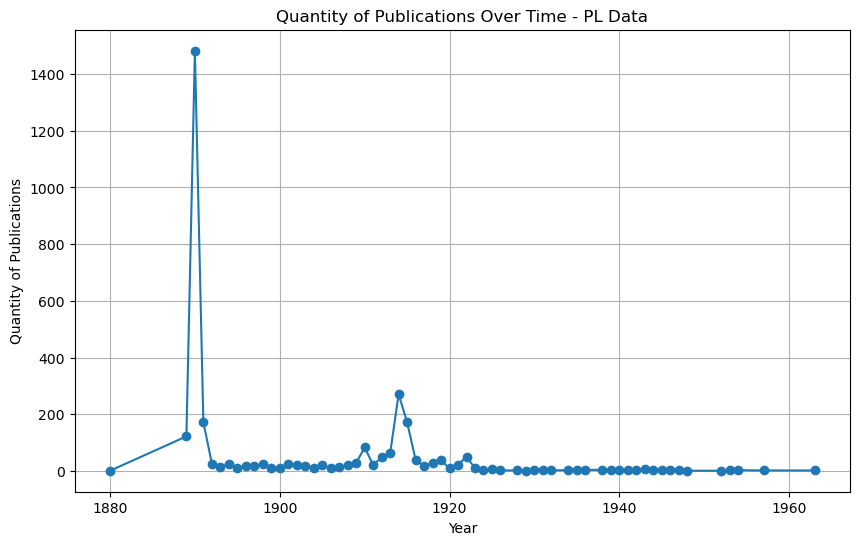

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
pl_data_df = pd.read_csv('../chroniclingamerica_csv/pl_data.csv')

# Ensure the 'Date' column is in datetime format
pl_data_df['Date'] = pd.to_datetime(pl_data_df['date'])

# Group by year and count the number of publications
pl_data_df['Year'] = pl_data_df['Date'].dt.year
publications_per_year = pl_data_df.groupby('Year').size().reset_index(name='Quantity')

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(publications_per_year['Year'], publications_per_year['Quantity'], marker='o')
plt.title('Quantity of Publications Over Time - PL Data')
plt.xlabel('Year')
plt.ylabel('Quantity of Publications')
plt.grid(True)
plt.show()

In [43]:
import pandas as pd
import altair as alt

# Load the data
pl_data_df = pd.read_csv('../chroniclingamerica_csv/pl_data.csv')

# Ensure the 'Date' column is in datetime format
pl_data_df['Date'] = pd.to_datetime(pl_data_df['date'])

# Group by year and count the number of publications
pl_data_df['Year'] = pl_data_df['Date'].dt.year
publications_per_year = pl_data_df.groupby('Year').size().reset_index(name='Quantity')

# Create the Altair chart
chart = alt.Chart(publications_per_year).mark_line(point=True).encode(
    x='Year:O',
    y='Quantity:Q',
    tooltip=['Year', 'Quantity']
).properties(
    title='Quantity of Publications Over Time - Altair PL Data',
    width=800,
    height=400
).interactive()

chart

alt.Chart(...)

### Altair charts:
- ##### Below are charts of our 5 leagues and the respected data.
    - Try clicking on the legend key for specific league and their newspaper data!

In [47]:
# Enable the use of larger datasets in Altair
alt.data_transformers.disable_max_rows()

# Define the file paths and their corresponding labels
file_paths = {
    '../chroniclingamerica_csv/pl_data.csv': 'PL',
    '../chroniclingamerica_csv/nnl_data.csv': 'NNL',
    '../chroniclingamerica_csv/fl_data.csv': 'FL',
    '../chroniclingamerica_csv/ecl_data.csv': 'ECL',
    '../chroniclingamerica_csv/aa_data.csv': 'AA'
}

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()

# Load and concatenate data from all CSV files
for file_path, label in file_paths.items():
    df = pd.read_csv(file_path, skiprows=1, names=['Newspaper', 'League', 'Date', 'URL'])
    if label == 'AA':
        df = df[(df['Date'] >= '1881-01-01') & (df['Date'] <= '1900-12-31')]  # Filter by active years in aa_data.csv
    df['Source'] = label  # Add a column to identify the source file
    all_data = pd.concat([all_data, df], ignore_index=True)

# Ensure the 'Date' column is in datetime format
all_data['Date'] = pd.to_datetime(all_data['Date'], errors='coerce')

# Drop rows with invalid dates
all_data = all_data.dropna(subset=['Date'])

# Group by year, newspaper, league, and source, and count the number of publications
all_data['Year'] = all_data['Date'].dt.year
publications_per_year = all_data.groupby(['Year', 'Newspaper', 'League', 'Source']).size().reset_index(name='Quantity')

chart

alt.Chart(...)

In [45]:
import altair as alt

# Create a selection object
selection = alt.selection_multi(fields=['League'], bind='legend')

# Create the Altair dot plot with colors representing different leagues
chart = alt.Chart(publications_per_year).mark_circle(size=60).encode(
    x='Year:O',
    y=alt.Y('Quantity:Q', scale=alt.Scale(domain=[0, 800])),  # Set the y-axis scale domain
    color=alt.Color('League:N', scale=alt.Scale(scheme='category10'), legend=alt.Legend(title="League", orient="top-right")),  # Use a categorical color scheme and place the legend at the top right
    tooltip=['Year', 'Quantity', 'Newspaper', 'League', 'Source'],
    opacity=alt.condition(selection, alt.value(1), alt.value(0.05))  # Adjust opacity based on selection
).properties(
    title='Quantity of Publications Over Time - Altair Data',
    width=800,
    height=400
).add_selection(
    selection
).interactive()

chart

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


alt.Chart(...)